In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
!conda env list

# conda environments:
#
GoogEarthEngine          /home/jp/miniconda2/envs/GoogEarthEngine
astroconda               /home/jp/miniconda2/envs/astroconda
everest-pipeline         /home/jp/miniconda2/envs/everest-pipeline
helios                   /home/jp/miniconda2/envs/helios
iraf27                *  /home/jp/miniconda2/envs/iraf27
ircs_pol                 /home/jp/miniconda2/envs/ircs_pol
moscatel                 /home/jp/miniconda2/envs/moscatel
radmc3dpy                /home/jp/miniconda2/envs/radmc3dpy
root                     /home/jp/miniconda2



In [1]:
import glob
import getpass
import os
try:
    from astropy.io import fits as pf
except:
    import pyfits as pf

path=os.path.join('home',getpass.getuser(),'data/imaging/ircs_UH30B/EPIC203824153')
    
#raw=glob.glob(os.path.join(path,'IRCA*.fits'))
raw=glob.glob(os.path.join('../..','IRCA*.fits'))
raw.sort()

len(raw)

60

In [5]:
img1, img2= pf.getdata(raw[0]), pf.getdata(raw[1])

In [ ]:
from scipy.signal import correlate2d  

correlate2d(img1,img2,mode='full', boundary='wrap')

In [13]:
for i in raw:
    hdr=pf.getheader(i)
    print('{0}; {1}'.format(hdr['FRAMEID'],hdr['I_DTHPOS']))

IRCA00447363; 1 : WP0
IRCA00447364; 1 : WP0
IRCA00447365; 1 : WP0
IRCA00447366; 1 : WP45
IRCA00447367; 1 : WP45
IRCA00447368; 1 : WP45
IRCA00447369; 1 : WP22.5
IRCA00447370; 1 : WP22.5
IRCA00447371; 1 : WP22.5
IRCA00447372; 1 : WP67.5
IRCA00447373; 1 : WP67.5
IRCA00447374; 1 : WP67.5
IRCA00447375; 2 : WP0
IRCA00447376; 2 : WP0
IRCA00447377; 2 : WP0
IRCA00447378; 2 : WP45
IRCA00447379; 2 : WP45
IRCA00447380; 2 : WP45
IRCA00447381; 2 : WP22.5
IRCA00447382; 2 : WP22.5
IRCA00447383; 2 : WP22.5
IRCA00447384; 2 : WP67.5
IRCA00447385; 2 : WP67.5
IRCA00447386; 2 : WP67.5
IRCA00447387; 3 : WP0
IRCA00447388; 3 : WP0
IRCA00447389; 3 : WP0
IRCA00447390; 3 : WP45
IRCA00447391; 3 : WP45
IRCA00447392; 3 : WP45
IRCA00447393; 3 : WP22.5
IRCA00447394; 3 : WP22.5
IRCA00447395; 3 : WP22.5
IRCA00447396; 3 : WP67.5
IRCA00447397; 3 : WP67.5
IRCA00447398; 3 : WP67.5
IRCA00447399; 4 : WP0
IRCA00447400; 4 : WP0
IRCA00447401; 4 : WP0
IRCA00447402; 4 : WP45
IRCA00447403; 4 : WP45
IRCA00447404; 4 : WP45
IRCA004474

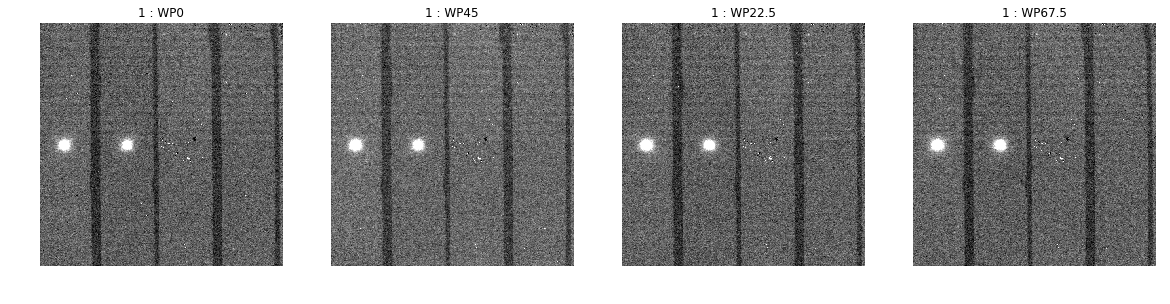

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
for idx,i in enumerate(raw[::3][:4]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])
    ax[idx].axis('off')

## Flat fielding, distortion correction, slicing

In [2]:
import glob
import getpass
import os
try:
    from astropy.io import fits as pf
except:
    import pyfits as pf

path=os.path.join('home',getpass.getuser(),'data/ircs_UH30B/EPIC203824153/crop')

ch1=glob.glob(os.path.join('..','IRCA*fg_ch1.fits'))
ch1.sort()
ch2=glob.glob(os.path.join('..','IRCA*fg_ch2.fits'))
ch2.sort()

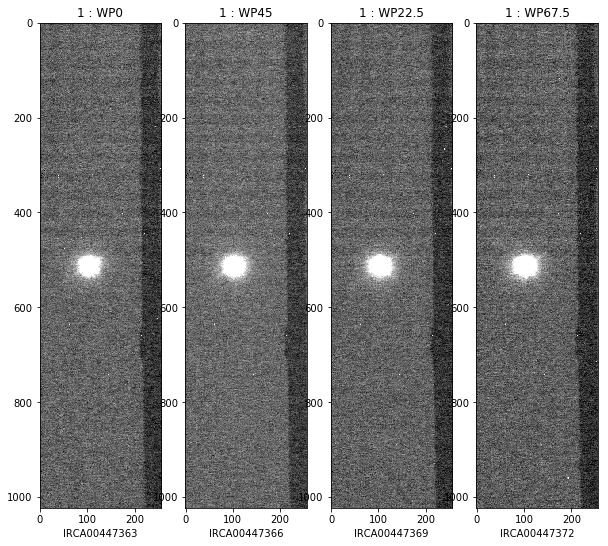

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(ch1[::3][:4]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

In [12]:
for i in ch1:
    hdr=pf.getheader(i)
    print('{0}; {1}'.format(hdr['FRAMEID'],hdr['I_DTHPOS']))

IRCA00447363; 1 : WP0
IRCA00447364; 1 : WP0
IRCA00447365; 1 : WP0
IRCA00447366; 1 : WP45
IRCA00447367; 1 : WP45
IRCA00447368; 1 : WP45
IRCA00447369; 1 : WP22.5
IRCA00447370; 1 : WP22.5
IRCA00447371; 1 : WP22.5
IRCA00447372; 1 : WP67.5
IRCA00447373; 1 : WP67.5
IRCA00447374; 1 : WP67.5
IRCA00447375; 2 : WP0
IRCA00447376; 2 : WP0
IRCA00447377; 2 : WP0
IRCA00447378; 2 : WP45
IRCA00447379; 2 : WP45
IRCA00447380; 2 : WP45
IRCA00447381; 2 : WP22.5
IRCA00447382; 2 : WP22.5
IRCA00447383; 2 : WP22.5
IRCA00447384; 2 : WP67.5
IRCA00447385; 2 : WP67.5
IRCA00447386; 2 : WP67.5
IRCA00447387; 3 : WP0
IRCA00447388; 3 : WP0
IRCA00447389; 3 : WP0
IRCA00447390; 3 : WP45
IRCA00447391; 3 : WP45
IRCA00447392; 3 : WP45
IRCA00447393; 3 : WP22.5
IRCA00447394; 3 : WP22.5
IRCA00447395; 3 : WP22.5
IRCA00447396; 3 : WP67.5
IRCA00447397; 3 : WP67.5
IRCA00447398; 3 : WP67.5
IRCA00447399; 4 : WP0
IRCA00447400; 4 : WP0
IRCA00447401; 4 : WP0
IRCA00447402; 4 : WP45
IRCA00447403; 4 : WP45
IRCA00447404; 4 : WP45
IRCA004474

In [13]:
for i in ch2:
    hdr=pf.getheader(i)
    print('{0}; {1}'.format(hdr['FRAMEID'],hdr['I_DTHPOS']))

IRCA00447363; 1 : WP0
IRCA00447364; 1 : WP0
IRCA00447365; 1 : WP0
IRCA00447366; 1 : WP45
IRCA00447367; 1 : WP45
IRCA00447368; 1 : WP45
IRCA00447369; 1 : WP22.5
IRCA00447370; 1 : WP22.5
IRCA00447371; 1 : WP22.5
IRCA00447372; 1 : WP67.5
IRCA00447373; 1 : WP67.5
IRCA00447374; 1 : WP67.5
IRCA00447375; 2 : WP0
IRCA00447376; 2 : WP0
IRCA00447377; 2 : WP0
IRCA00447378; 2 : WP45
IRCA00447379; 2 : WP45
IRCA00447380; 2 : WP45
IRCA00447381; 2 : WP22.5
IRCA00447382; 2 : WP22.5
IRCA00447383; 2 : WP22.5
IRCA00447384; 2 : WP67.5
IRCA00447385; 2 : WP67.5
IRCA00447386; 2 : WP67.5
IRCA00447387; 3 : WP0
IRCA00447388; 3 : WP0
IRCA00447389; 3 : WP0
IRCA00447390; 3 : WP45
IRCA00447391; 3 : WP45
IRCA00447392; 3 : WP45
IRCA00447393; 3 : WP22.5
IRCA00447394; 3 : WP22.5
IRCA00447395; 3 : WP22.5
IRCA00447396; 3 : WP67.5
IRCA00447397; 3 : WP67.5
IRCA00447398; 3 : WP67.5
IRCA00447399; 4 : WP0
IRCA00447400; 4 : WP0
IRCA00447401; 4 : WP0
IRCA00447402; 4 : WP45
IRCA00447403; 4 : WP45
IRCA00447404; 4 : WP45
IRCA004474

## Sky subtraction (next PA)

In [14]:
nframes = 3
wpangle=4
ndither=5

for i in range(12):
    hdr1 = pf.getheader(ch1[i])['I_DTHPOS']
    hdr2 = pf.getheader(ch1[i+nframes*wpangle])['I_DTHPOS']
    #print('{0} - {1}'.format(i,i+nframes))
    print('{0} - {1}'.format(hdr1, hdr2))
for i in range(len(ch2)-(nframes*wpangle)):
    hdr1 = pf.getheader(ch1[i+nframes*wpangle])['I_DTHPOS']
    hdr2 = pf.getheader(ch1[i])['I_DTHPOS']
    #print('{0} - {1}'.format(i+nframes,i))
    print('{0} - {1}'.format(hdr1, hdr2))

1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP67.5 - 3 : WP67.5
4 : WP67.5 - 3 :

In [15]:
!pwd

/home/jp/data/imaging/ircs_UH30B/EPIC203824153/crop/skysub


## skysubtraction (next dither)

In [16]:
skysub_ch1 = glob.glob('*fgs_ch1.fits')
skysub_ch1.sort()
skysub_ch2 = glob.glob('*fgs_ch2.fits')
skysub_ch2.sort()

In [17]:
nframes = 3
wpangle=4
ndither=5

for i in range(12):
    hdr1 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    #print('{0} - {1}'.format(i,i+nframes))
    print('{0} - {1}'.format(hdr1, hdr2))
for i in range(len(skysub_ch1)-(nframes*wpangle)):
    hdr1 = pf.getheader(skysub_ch1[i+nframes*wpangle])['I_DTHPOS']
    hdr2 = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    #print('{0} - {1}'.format(i+nframes,i))
    print('{0} - {1}'.format(hdr1, hdr2))

1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP0 - 2 : WP0
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP45 - 2 : WP45
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP22.5 - 2 : WP22.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
1 : WP67.5 - 2 : WP67.5
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP0 - 1 : WP0
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP45 - 1 : WP45
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP22.5 - 1 : WP22.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
2 : WP67.5 - 1 : WP67.5
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP0 - 2 : WP0
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP45 - 2 : WP45
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP22.5 - 2 : WP22.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
3 : WP67.5 - 2 : WP67.5
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP0 - 3 : WP0
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP45 - 3 : WP45
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP22.5 - 3 : WP22.5
4 : WP67.5 - 3 : WP67.5
4 : WP67.5 - 3 :

In [281]:
len(skysub_ch1)

60

In [282]:
len(skysub_ch2)

60

## Check frames

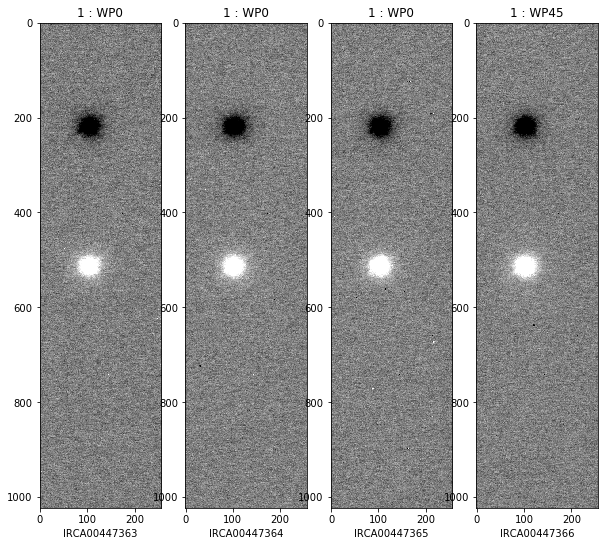

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.visualization import ZScaleInterval
interval= ZScaleInterval()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[:4]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

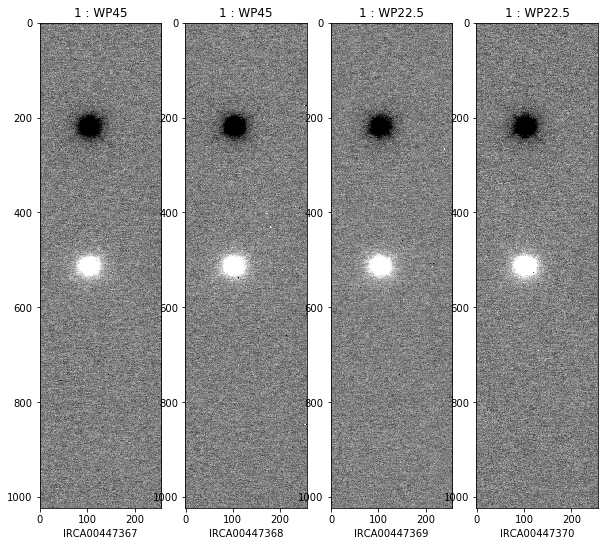

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[4:8]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

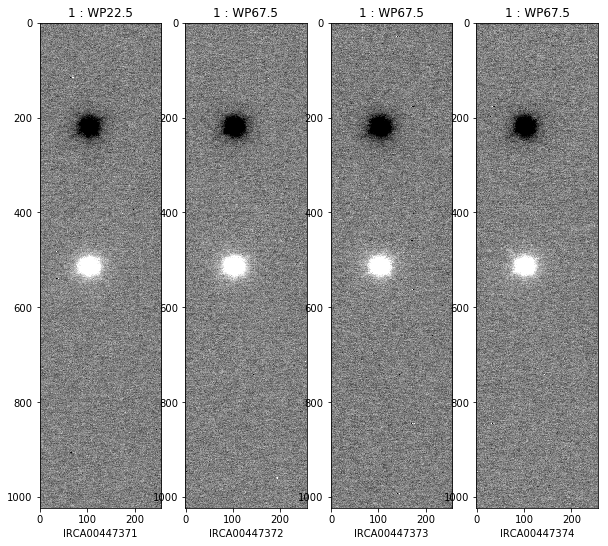

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
for idx,i in enumerate(skysub_ch1[8:12]):
    img = pf.getdata(i)
    hdr = pf.getheader(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    ax[idx].set_title(hdr['I_DTHPOS'])
    ax[idx].set_xlabel(hdr['FRAMEID'])

In [24]:
#load all images into dict
img_ch1 = {}
img_ch2 = {}

for idx,i in enumerate(skysub_ch1[:12]):
    hdr = pf.getheader(i)['I_DTHPOS']
    img = pf.getdata(i)
    img_ch1[hdr] = img
    
for idx,j in enumerate(skysub_ch2[:12]):
    hdr = pf.getheader(j)['I_DTHPOS']
    img = pf.getdata(j)
    print(hdr)
    img_ch2[hdr] = img

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5


## 1 waveplate rotation set

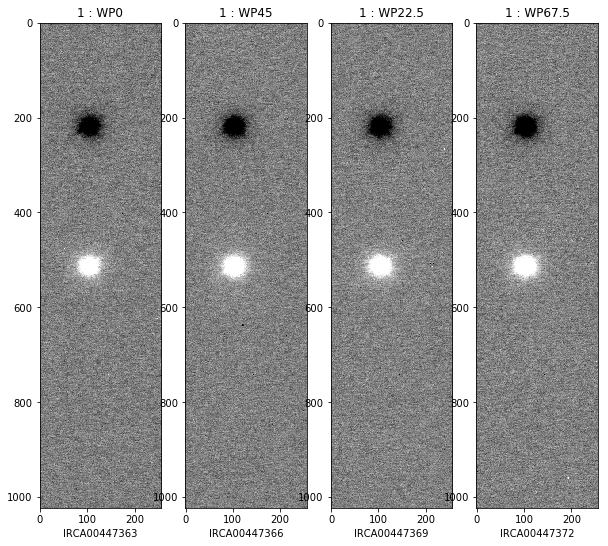

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,20))
idx=0
for i in skysub_ch1[:12][::3]:
    hdr = pf.getheader(i)
    img = pf.getdata(i)
    vmin, vmax = interval.get_limits(img)
    ax[idx].imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
    if isinstance(hdr['I_DTHPOS'], str): 
        ax[idx].set_title(hdr['I_DTHPOS'])
        ax[idx].set_xlabel(hdr['FRAMEID'])
    else:
        pass
    idx+=1

## combine I images (dither 1)

In [26]:
I = {}

for i in range(12):
    hdr = pf.getheader(skysub_ch1[i])['I_DTHPOS']
    img1 = pf.getdata(skysub_ch1[i])
    img2 = pf.getdata(skysub_ch2[i])
    I[i] = img1 + img2
    print(hdr)

1 : WP0
1 : WP0
1 : WP0
1 : WP45
1 : WP45
1 : WP45
1 : WP22.5
1 : WP22.5
1 : WP22.5
1 : WP67.5
1 : WP67.5
1 : WP67.5


In [27]:
I.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [28]:
Q = {}
U = {}

for i in range(12)[::3]:
    hdr = pf.getheader(ch1[i])['I_DTHPOS']
    print(i)
    #Q = I[i] - I[i+1+3]
    #U = I[i+2] - I[i+3+3]

0
3
6
9


## Q

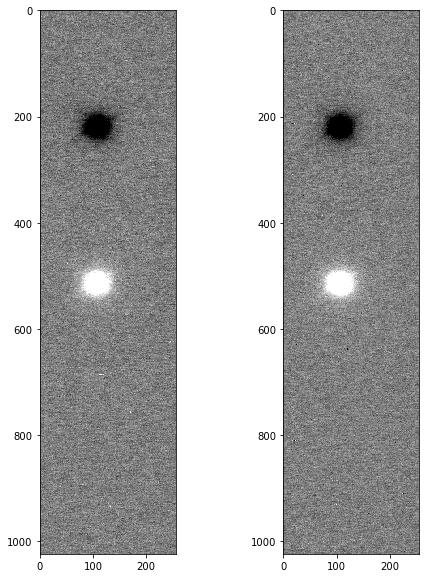

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,10))

n1, n2 = 0, 3
vmin1, vmax1 = interval.get_limits(I[n1])
vmin2, vmax2 = interval.get_limits(I[n2])

ax[0].imshow(I[n1], vmin=vmin1, vmax=vmax1, cmap='gray')
ax[1].imshow(I[n2], vmin=vmin2, vmax=vmax2, cmap='gray')

## U

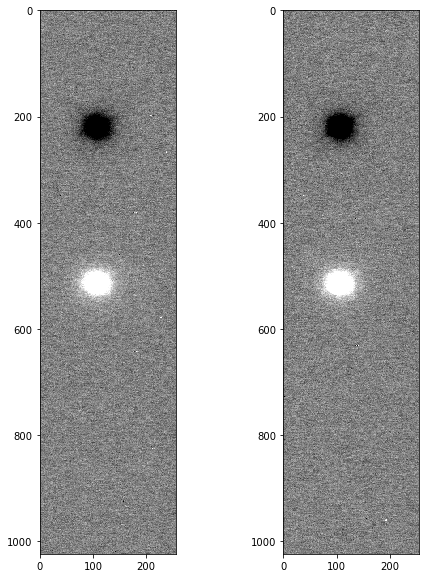

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,10))

n1, n2 = 6, 9
vmin1, vmax1 = interval.get_limits(I[n1])
vmin2, vmax2 = interval.get_limits(I[n2])

ax[0].imshow(I[n1], vmin=vmin1, vmax=vmax1, cmap='gray')
ax[1].imshow(I[n2], vmin=vmin2, vmax=vmax2, cmap='gray')

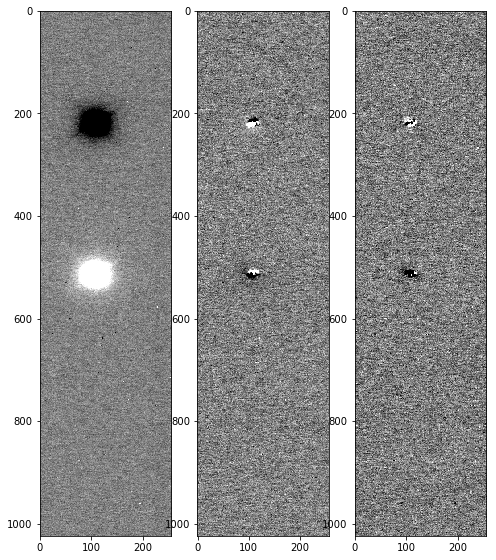

In [31]:
Q = I[0] - I[3]
U = I[6] - I[9]
#1 set
Itot = (I[0] +  I[3] + I[6] +  I[9])/4

vmin1, vmax1 = interval.get_limits(Itot)
vmin2, vmax2 = interval.get_limits(Q)
vmin3, vmax3 = interval.get_limits(U)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,20))

ax[0].imshow(Itot, vmin=vmin1, vmax=vmax1, cmap='gray')
ax[1].imshow(Q, vmin=vmin2, vmax=vmax2, cmap='gray')
ax[2].imshow(U, vmin=vmin3, vmax=vmax3, cmap='gray')

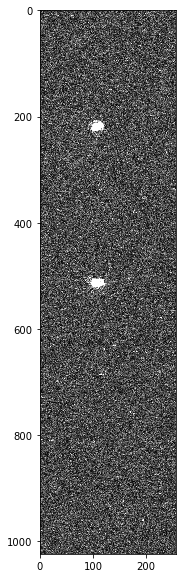

In [32]:
import numpy as np

PI = np.sqrt(Q**2+U**2)

vmin, vmax = interval.get_limits(PI)

#figsize=(10,10)

plt.figure(figsize=(10,10))
plt.imshow(PI, vmin=vmin, vmax=vmax, cmap='gray')

## PI of one WP set (dither=1)

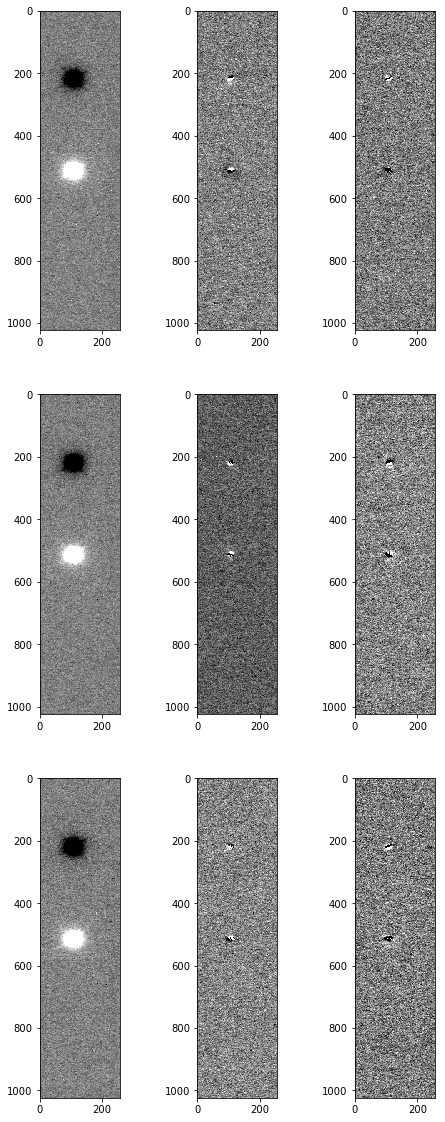

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,20))

Q_set=[]
U_set=[]
Itot_set=[]


#for each NFRAME=3 
for i in range(3):
    Q = I[i] - I[i+3]
    U = I[i+6] - I[i+9]
    Itot = (I[i] +  I[i+3] + I[i+6] +  I[i+9])/4.0
    
    Q_set.append(Q)
    U_set.append(U)
    Itot_set.append(Itot)

    vmin1, vmax1 = interval.get_limits(Itot)
    vmin2, vmax2 = interval.get_limits(Q)
    vmin3, vmax3 = interval.get_limits(U)

    ax[i,0].imshow(Itot, vmin=vmin1, vmax=vmax1, cmap='gray')
    ax[i,1].imshow(Q, vmin=vmin2, vmax=vmax2, cmap='gray')
    ax[i,2].imshow(U, vmin=vmin3, vmax=vmax3, cmap='gray')

## median combined I, Q, U, PI (dither=1)

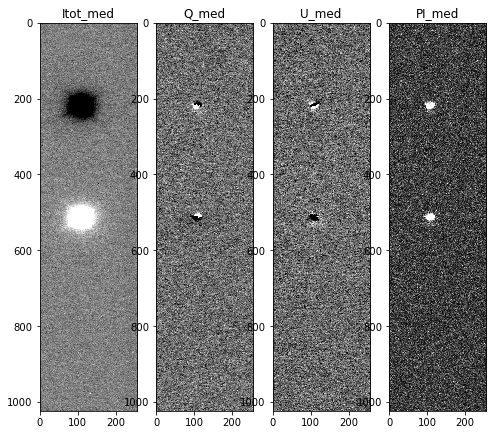

In [34]:
U_med = np.median(U_set, axis=0)
Q_med = np.median(Q_set, axis=0)
Itot_med = np.median(Itot_set, axis=0)
PI_med = np.sqrt(Q_med**2+U_med**2)

vmin1, vmax1 = interval.get_limits(Itot_med)
vmin2, vmax2 = interval.get_limits(Q_med)
vmin3, vmax3 = interval.get_limits(U_med)
vmin4, vmax4 = interval.get_limits(PI_med)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8,20))

ax[0].imshow(Itot_med, vmin=vmin1, vmax=vmax1, cmap='gray')
ax[0].set_title('Itot_med')
ax[1].imshow(Q_med, vmin=vmin2, vmax=vmax2, cmap='gray')
ax[1].set_title('Q_med')
ax[2].imshow(U_med, vmin=vmin3, vmax=vmax3, cmap='gray')
ax[2].set_title('U_med')
ax[3].imshow(PI_med, vmin=vmin4, vmax=vmax4, cmap='gray')
ax[3].set_title('PI_med')